In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

- [x] Create a new notebook, `logistic_regression`, use it to answer the following questions:

In [24]:
# local imports
import acquire
import prepare
import model

# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# modeling and stats imports
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

In [34]:
# import dataset
raw_titanic = acquire.get_titanic_data()
acquire.df_info(raw_titanic,samples=3)

Reading from file...


,nunique,dtypes,isnull,659,92,289
passenger_id,891,int64,0,659,92,289
survived,2,int64,0,0,0,1
pclass,3,int64,0,1,1,3
sex,2,object,0,male,male,female
age,88,float64,177,58.0,46.0,22.0
sibsp,7,int64,0,0,1,0
parch,7,int64,0,2,0,0
fare,248,float64,0,113.275,61.175,7.75
embarked,3,object,2,C,S,Q
class,3,object,0,First,First,Third


In [36]:
# prepare dataset
titanic = prepare.prep_titanic(raw_titanic)
acquire.df_info(titanic,samples=3)

,nunique,dtypes,isnull,695,877,1
passenger_id,891,object,0,695,877,1
survived,2,object,0,0,0,1
pclass,3,object,0,2,3,1
sex,2,object,0,male,male,female
age,91,float64,0,52.0,19.0,38.0
sibsp,7,object,0,0,0,1
parch,7,object,0,0,0,0
fare,248,float64,0,13.5,7.8958,71.2833
embark_town,3,object,0,Southampton,Southampton,Cherbourg
alone,2,object,0,1,1,0


In [38]:
# split dataset
tvt_set = train,validate,test = prepare.split_df(titanic,'survived')

[print(df.shape) for df in tvt_set]

acquire.df_info(tvt_set[0])

(534, 10)
(178, 10)
(179, 10)


,nunique,dtypes,isnull,432
passenger_id,534,object,0,432
survived,2,object,0,1
pclass,3,object,0,2
sex,2,object,0,female
age,79,float64,0,42.0
sibsp,7,object,0,1
parch,6,object,0,0
fare,194,float64,0,26.0
embark_town,3,object,0,Southampton
alone,2,object,0,0


In [42]:
# encode dataset for modeling
encoded = e_train,e_val,e_test = [model.preprocess_titanic(df) for df in tvt_set]

[print(df.shape) for df in encoded]

acquire.df_info(encoded[0])

(534, 10)
(178, 10)
(179, 10)


,nunique,dtypes,isnull,174
survived,2,float64,0,0.0000
pclass,3,float64,0,1.0000
age,79,float64,0,56.0000
sibsp,7,float64,0,0.0000
parch,6,float64,0,0.0000
fare,194,float64,0,30.6958
alone,2,float64,0,1.0000
is_male,2,float64,0,1.0000
is_Queenstown,2,float64,0,0.0000
is_Southampton,2,float64,0,0.0000


In [44]:
# split into X and y sets
X_set = X_train,X_val,X_test = [df.drop(columns='survived') for df in encoded]
y_set = y_train,y_val,y_test = [df['survived'] for df in encoded]

[print(df.shape) for df in X_set]

acquire.df_info(X_set[0])

(534, 9)
(178, 9)
(179, 9)


,nunique,dtypes,isnull,746
pclass,3,float64,0,3.00
age,79,float64,0,16.00
sibsp,7,float64,0,1.00
parch,6,float64,0,1.00
fare,194,float64,0,20.25
alone,2,float64,0,0.00
is_male,2,float64,0,1.00
is_Queenstown,2,float64,0,0.00
is_Southampton,2,float64,0,1.00


1. [x] Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [67]:
# get baseline
baseline = y_train.mode()[0]
baseline

0.0

In [91]:
# get baseline accuracy
baseline_acc = (baseline == y_train).mean()
baseline_acc

0.6161048689138576

In [148]:
# isolate features
features = ['age','fare','pclass']

In [118]:
# create model
lr = LogisticRegression()

In [120]:
# fit the model (using only age, fare, and pclass)
lr.fit(X_train[features],y_train)

LogisticRegression()

In [122]:
# score the model
lr.score(X_train[features],y_train)

0.702247191011236

70% beats the baseline, so it performs pretty decently.

2. [ ] Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [150]:
# add is_Male to features
features.append('is_male')

In [128]:
# create new model
lr2 = LogisticRegression()

In [130]:
# fit model (now using age, fare, pclass, and sex)
lr2.fit(X_train[features],y_train)

LogisticRegression()

In [134]:
# evaluate against baseline
lr2.score(X_train[features],y_train)

0.8146067415730337

In [138]:
lr2.score(X_train[features],y_train) > baseline_acc

True

In [156]:
# evaluate against first model
lr2.score(X_train[features],y_train) > lr.score(X_train[features[:3]],y_train)

True

3. [x] Try out other combinations of features and models.

In [159]:
# saw this elsewhere, let's import itertools
import itertools

In [205]:
# get all combinations of features
all_combinations = []
for r in range(2,len(X_train.columns)+1):
    combinations_object = itertools.combinations(X_train.columns,r)
    all_combinations.extend(list(combinations_object))

In [215]:
for features in all_combinations[:30]:
    print(list(features))

['pclass', 'age']
['pclass', 'sibsp']
['pclass', 'parch']
['pclass', 'fare']
['pclass', 'alone']
['pclass', 'is_male']
['pclass', 'is_Queenstown']
['pclass', 'is_Southampton']
['age', 'sibsp']
['age', 'parch']
['age', 'fare']
['age', 'alone']
['age', 'is_male']
['age', 'is_Queenstown']
['age', 'is_Southampton']
['sibsp', 'parch']
['sibsp', 'fare']
['sibsp', 'alone']
['sibsp', 'is_male']
['sibsp', 'is_Queenstown']
['sibsp', 'is_Southampton']
['parch', 'fare']
['parch', 'alone']
['parch', 'is_male']
['parch', 'is_Queenstown']
['parch', 'is_Southampton']
['fare', 'alone']
['fare', 'is_male']
['fare', 'is_Queenstown']
['fare', 'is_Southampton']


In [255]:
# create all the models!
metrics = []

for features in all_combinations:
    features = list(features)
    model = LogisticRegression()
    
    model.fit(X_train[features],y_train)
    
    output = {
        'model':model,
        'features':features,
        'train_acc':model.score(X_train[features],y_train),
        'validate_acc':model.score(X_val[features],y_val)
    }
    
    metrics.append(output)
    
    

In [412]:
df = pd.DataFrame(metrics)
df["avg_score"] = df[['train_acc','validate_acc']].mean(axis=1).round(4)
df["difference"] = round(df.train_acc - df.validate_acc,4)
len(df)

502

In [414]:
# Drop if the model validate doesn't exceed baseline
df = df[df.validate_acc >= baseline_acc]
df

,model,features,train_acc,validate_acc,avg_score,difference
0,LogisticRegression(),"[pclass, age]",0.698502,0.679775,0.6891,0.0187
1,LogisticRegression(),"[pclass, sibsp]",0.672285,0.685393,0.6788,-0.0131
2,LogisticRegression(),"[pclass, parch]",0.689139,0.696629,0.6929,-0.0075
3,LogisticRegression(),"[pclass, fare]",0.672285,0.685393,0.6788,-0.0131
4,LogisticRegression(),"[pclass, alone]",0.719101,0.657303,0.6882,0.0618
...,...,...,...,...,...,...
497,LogisticRegression(),"[pclass, age, sibsp, fare, alone, is_male, is_Queenstown, is_Southampton]",0.816479,0.775281,0.7959,0.0412
498,LogisticRegression(),"[pclass, age, parch, fare, alone, is_male, is_Queenstown, is_Southampton]",0.818352,0.769663,0.7940,0.0487
499,LogisticRegression(),"[pclass, sibsp, parch, fare, alone, is_male, is_Queenstown, is_Southampton]",0.799625,0.735955,0.7678,0.0637
500,LogisticRegression(),"[age, sibsp, parch, fare, alone, is_male, is_Queenstown, is_Southampton]",0.797753,0.764045,0.7809,0.0337


In [416]:
# drop if average score isn't better than the overall mean of avg_score
df = df[df.avg_score > df.avg_score.mean()]
df

,model,features,train_acc,validate_acc,avg_score,difference
5,LogisticRegression(),"[pclass, is_male]",0.799625,0.752809,0.7762,0.0468
12,LogisticRegression(),"[age, is_male]",0.799625,0.752809,0.7762,0.0468
18,LogisticRegression(),"[sibsp, is_male]",0.803371,0.752809,0.7781,0.0506
23,LogisticRegression(),"[parch, is_male]",0.799625,0.752809,0.7762,0.0468
27,LogisticRegression(),"[fare, is_male]",0.794007,0.747191,0.7706,0.0468
...,...,...,...,...,...,...
497,LogisticRegression(),"[pclass, age, sibsp, fare, alone, is_male, is_Queenstown, is_Southampton]",0.816479,0.775281,0.7959,0.0412
498,LogisticRegression(),"[pclass, age, parch, fare, alone, is_male, is_Queenstown, is_Southampton]",0.818352,0.769663,0.7940,0.0487
499,LogisticRegression(),"[pclass, sibsp, parch, fare, alone, is_male, is_Queenstown, is_Southampton]",0.799625,0.735955,0.7678,0.0637
500,LogisticRegression(),"[age, sibsp, parch, fare, alone, is_male, is_Queenstown, is_Southampton]",0.797753,0.764045,0.7809,0.0337


In [418]:
# drop if difference is greater than average difference
df = df[df.difference < df.difference.mean()]
df.head(10)

,model,features,train_acc,validate_acc,avg_score,difference
94,LogisticRegression(),"[sibsp, alone, is_male]",0.803371,0.764045,0.7837,0.0393
104,LogisticRegression(),"[parch, alone, is_male]",0.801498,0.758427,0.7800,0.0431
107,LogisticRegression(),"[parch, is_male, is_Queenstown]",0.799625,0.758427,0.7790,0.0412
110,LogisticRegression(),"[fare, alone, is_male]",0.794007,0.752809,0.7734,0.0412
123,LogisticRegression(),"[pclass, age, sibsp, is_male]",0.818352,0.780899,0.7996,0.0375
135,LogisticRegression(),"[pclass, age, alone, is_male]",0.818352,0.775281,0.7968,0.0431
138,LogisticRegression(),"[pclass, age, is_male, is_Queenstown]",0.812734,0.769663,0.7912,0.0431
139,LogisticRegression(),"[pclass, age, is_male, is_Southampton]",0.810861,0.775281,0.7931,0.0356
147,LogisticRegression(),"[pclass, sibsp, fare, is_male]",0.801498,0.758427,0.7800,0.0431
150,LogisticRegression(),"[pclass, sibsp, alone, is_male]",0.792135,0.764045,0.7781,0.0281


In [420]:
# drop if validate accuracy is less than average validate
df = df[df.validate_acc > df.validate_acc.mean()]
len(df)

54

In [422]:
df = df.sort_values(['validate_acc','train_acc'],ascending=[False,True]).reset_index(drop=True)
df

,model,features,train_acc,validate_acc,avg_score,difference
0,LogisticRegression(),"[pclass, age, sibsp, parch, fare, is_male, is_Southampton]",0.810861,0.786517,0.7987,0.0243
1,LogisticRegression(),"[pclass, age, sibsp, parch, fare, is_male]",0.812734,0.786517,0.7996,0.0262
2,LogisticRegression(),"[pclass, age, sibsp, parch, fare, is_male, is_Queenstown]",0.812734,0.786517,0.7996,0.0262
3,LogisticRegression(),"[pclass, age, sibsp, parch, fare, is_male, is_Queenstown, is_Southampton]",0.812734,0.786517,0.7996,0.0262
4,LogisticRegression(),"[pclass, age, sibsp, fare, is_male]",0.820225,0.786517,0.8034,0.0337
5,LogisticRegression(),"[pclass, age, sibsp, fare, is_male, is_Queenstown]",0.820225,0.786517,0.8034,0.0337
6,LogisticRegression(),"[pclass, age, sibsp, fare, is_male, is_Southampton]",0.820225,0.786517,0.8034,0.0337
7,LogisticRegression(),"[pclass, age, sibsp, parch, fare, alone, is_male, is_Queenstown, is_Southampton]",0.820225,0.786517,0.8034,0.0337
8,LogisticRegression(),"[pclass, age, sibsp, parch, is_male, is_Queenstown]",0.816479,0.780899,0.7987,0.0356
9,LogisticRegression(),"[pclass, age, sibsp, parch, is_male, is_Southampton]",0.816479,0.780899,0.7987,0.0356


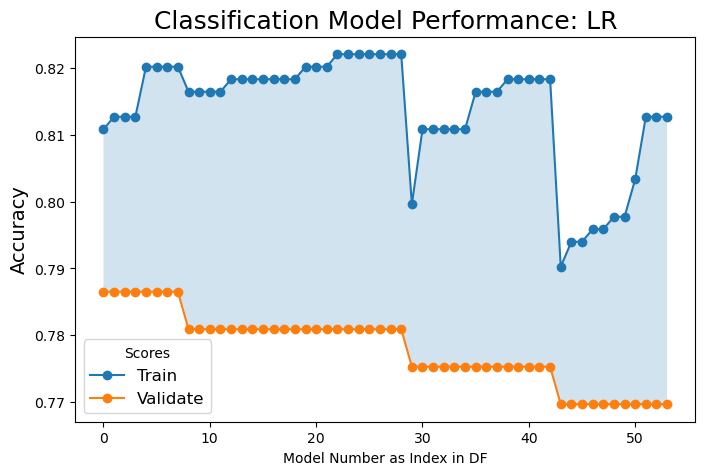

In [424]:
plt.figure(figsize=(8, 5))
plt.plot(df.index, df.train_acc, label="Train", marker="o")
plt.plot(df.index, df.validate_acc, label="Validate", marker="o")
plt.fill_between(df.index, df.train_acc, df.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: LR", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

4. [x] Use your best 3 models to predict and evaluate on your validate sample.

In [405]:
df.head(3)

,model,features,train_acc,validate_acc,avg_score,difference
0,LogisticRegression(),"[pclass, age, sibsp, parch, fare, is_male, is_Southampton]",0.810861,0.786517,0.7987,0.0243
1,LogisticRegression(),"[pclass, age, sibsp, parch, fare, is_male]",0.812734,0.786517,0.7996,0.0262
2,LogisticRegression(),"[pclass, age, sibsp, parch, fare, is_male, is_Queenstown]",0.812734,0.786517,0.7996,0.0262


5. [x] Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?


In [428]:
best_model = df.iloc[0,0]
features = df.iloc[0,1]

In [432]:
best_model.score(X_test[features],y_test)

0.8044692737430168

In [438]:
print(f'Train: {best_model.score(X_train[features],y_train)}')
print(f'Validate: {best_model.score(X_val[features],y_val)}')
print(f'Test: {best_model.score(X_test[features],y_test)}')


Train: 0.8108614232209738
Validate: 0.7865168539325843
Test: 0.8044692737430168


- [ ] **Bonus1** How do different strategies for handling the missing values in the age column affect model performance?


- [ ] **Bonus2**: How do different strategies for encoding sex affect model performance?


- [ ] **Bonus3**: `scikit-learn`'s `LogisticRegression` classifier is actually applying [a regularization penalty to the coefficients](https://en.wikipedia.org/wiki/Regularized_least_squares) by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the `C` hyper parameter. Small values of `C` correspond to a larger penalty, and large values of `C` correspond to a smaller penalty.

Try out the following values for `C` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

$$
C=.01,.1,1,10,100,1000
$$

- [ ] **Bonus Bonus**: how does scaling the data interact with your choice of `C`?